# Generator Example #2 - Time series
In this notebook we we present a continuation to example #1, where tabular data was created.<br>
Here we show instead the functionalities to time series generation.<br>
This is inspected in the form of creating series typical from signal processing.

In [1]:
from lib import Generator, TRANSFORMATIONS, VARIABLES
from math import pi
import random

## Harmónicos
### Recreation of the series "Harmónicos"
This type of signal originates from the overlapping of 2 or more sinusoidal signals.<br>
All signals have a frequency that is a multiple of those with lower frequencies.<br>
<br>
The simplest way to create a sinusoidal signal is to first create a base counter variable that increases.<br>
Then, change the frequency by multiplying this counter.<br>
Then, turn it into a sinusoidal wave by applying "sin".<br>
Finally, multiply it by a value to change amplitude.<br>
<br>
In general complex signals are just a sum of a few basic signals.

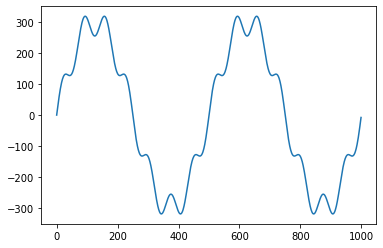

In [2]:
N = 1000

gen = Generator()
# create increasing counter
gen.add_variable(VARIABLES.Counter.value, name="base_idx", start_value=0)

# create harmonic 1
gen.add_transformation(TRANSFORMATIONS.Mult.value, in_columns=["base_idx"], out_columns=["h1_idx"], value=(2*2*pi)/N, drop_input=False)
gen.add_transformation(TRANSFORMATIONS.Sin.value, in_columns=["h1_idx"], out_columns=["h1"], drop_input=True)
gen.add_transformation(TRANSFORMATIONS.Mult.value, in_columns=["h1"], value=300)

# create harmonic 2
gen.add_transformation(TRANSFORMATIONS.Mult.value, in_columns=["base_idx"], out_columns=["h2_idx"], value=(14*2*pi)/N, drop_input=False)
gen.add_transformation(TRANSFORMATIONS.Sin.value, in_columns=["h2_idx"], out_columns=["h2"], drop_input=True)
gen.add_transformation(TRANSFORMATIONS.Mult.value, in_columns=["h2"], value=45)

# sum both signals together
gen.add_transformation(TRANSFORMATIONS.Sum.value, in_columns=["h1","h2"], out_column="h", drop_input=False)

df = gen.generate(N)
df["h"].plot(subplots=True);

## Ruído (interferência electromagnetica)
### Recreation of the series "Ruído (interferência electromagnetica)"
This signal is created when an electromagnetic interference affects a primary signal.<br>
The interference has significantly higher frequency than the original signal.<br>
<br>
This example can be created in a very similar way to the previous one.<br>
The second signal just has a much higher frequency.

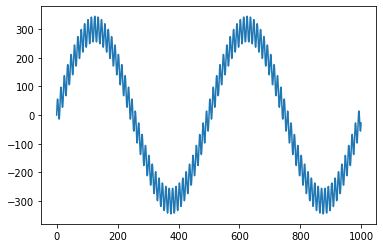

In [3]:
N = 1000

gen = Generator()
# create increasing counter
gen.add_variable(VARIABLES.Counter.value, name="base_idx", start_value=0)

# create base signal
gen.add_transformation(TRANSFORMATIONS.Mult.value, in_columns=["base_idx"], out_columns=["h1_idx"], value=(2*2*pi)/N, drop_input=False)
gen.add_transformation(TRANSFORMATIONS.Sin.value, in_columns=["h1_idx"], out_columns=["h1"], drop_input=True)
gen.add_transformation(TRANSFORMATIONS.Mult.value, in_columns=["h1"], value=300)

# create interference signal
gen.add_transformation(TRANSFORMATIONS.Mult.value, in_columns=["base_idx"], out_columns=["h2_idx"], value=(90*2*pi)/N, drop_input=False)
gen.add_transformation(TRANSFORMATIONS.Sin.value, in_columns=["h2_idx"], out_columns=["h2"], drop_input=True)
gen.add_transformation(TRANSFORMATIONS.Mult.value, in_columns=["h2"], value=45)

# sum both signals together
gen.add_transformation(TRANSFORMATIONS.Sum.value, in_columns=["h1","h2"], out_column="h", drop_input=False)

df = gen.generate(N)
df["h"].plot(subplots=True);

## Inter-harmónicos
### Recreation of the series "Inter-harmónicos"
This type of signal occurs when many sinusoidal waves from different sources are combined.<br>
Each has a distinct frequency and amplitude, which created an unpredictable output signal.<br>
<br>
This was done in the generator by creating many signals with random amplitudes and frequencies.<br>
Then all the signals are summed together.

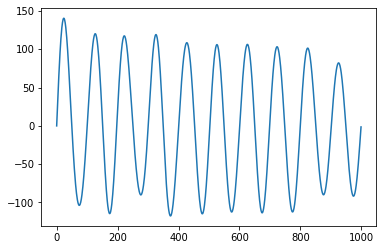

In [4]:
N = 1000

gen = Generator()
# create increasing counter
gen.add_variable(VARIABLES.Counter.value, name="base_idx", start_value=0)

# create base signal
gen.add_transformation(TRANSFORMATIONS.Mult.value, in_columns=["base_idx"], out_columns=["h1_idx"], value=(10*2*pi)/N, drop_input=False)
gen.add_transformation(TRANSFORMATIONS.Sin.value, in_columns=["h1_idx"], out_columns=["h1"], drop_input=True)
gen.add_transformation(TRANSFORMATIONS.Mult.value, in_columns=["h1"], value=100)

for inter_harmonic in range(10): # create random signals
    gen.add_transformation(TRANSFORMATIONS.Mult.value, in_columns=["base_idx"], out_columns=["ih_idx"], value=(random.uniform(1,20)*2*pi)/N, drop_input=False)
    gen.add_transformation(TRANSFORMATIONS.Sin.value, in_columns=["ih_idx"], out_columns=["ih"], drop_input=True)
    gen.add_transformation(TRANSFORMATIONS.Mult.value, in_columns=["ih"], value=random.uniform(1,10))

    # add new signal with all previous
    gen.add_transformation(TRANSFORMATIONS.Sum.value, in_columns=["h1","ih"], out_column="h1", drop_input=False)

df = gen.generate(N)
df["h1"].plot(subplots=True);

## Interrupção Moentânea
### Recreation of the series "Interrupção Momentânea"
When there is a momentary cutoff this type of signal can occur.<br>
Either due to the source being stopped or interrupted, or the sensor.<br>
<br>
Unlike for previous example, here we use a very useful generation pattern.<br>
Different states are created and a markov chain is used to define state transitions.<br>
In this case, one state is the normal sinusoidal signal, while another is the constant value.<br>

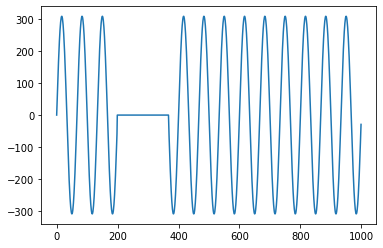

In [36]:
N = 1000

gen = Generator()
# create increasing counter
gen.add_variable(VARIABLES.Counter.value, name="base_idx", start_value=0)
# define state transitions
gen.add_variable(VARIABLES.MarkovChain.value, name="states", start_value="A", states=["A","B"], transitions=[("A","B",0.001),("B","A",0.005)])

# create state #1 - base signal
gen.add_transformation(TRANSFORMATIONS.Mult.value, in_columns=["base_idx"], out_columns=["h1_idx"], value=(15*2*pi)/N, drop_input=False)
gen.add_transformation(TRANSFORMATIONS.Sin.value, in_columns=["h1_idx"], out_columns=["h1"], drop_input=True)
gen.add_transformation(TRANSFORMATIONS.Mult.value, in_columns=["h1"], value=310)

# create state #2 - constant
gen.add_variable(VARIABLES.Constant.value, name="constant", value=0)

# setup states in accordance to defined states and transitions
gen.add_transformation(TRANSFORMATIONS.StateChange.value, in_columns=["h1","constant"], state_column="states", states=["A","B"], out_column="interruption", drop_input=False)

df = gen.generate(N)
df["interruption"].plot(subplots=True);

## Subtenção Momentânea (sag)
### Recreation of the series "Subtenção Momentânea (sag)".
Whenever there is sub-tension in a source, the amplitude of the signal can temporarily decrease.<br>
<br>
The same pattern is used as before, but this time instead of a constant, a sinusoidal is created.

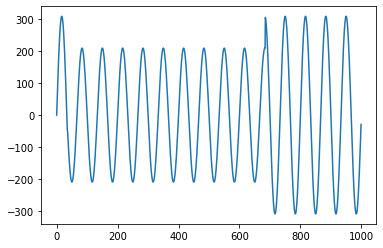

In [24]:
N = 1000

gen = Generator()
# create increasing counter
gen.add_variable(VARIABLES.Counter.value, name="base_idx", start_value=0)
# define state transitions
gen.add_variable(VARIABLES.MarkovChain.value, name="states", start_value="A", states=["A","B"], transitions=[("A","B",0.001),("B","A",0.005)])

# create state #1 - base signal
gen.add_transformation(TRANSFORMATIONS.Mult.value, in_columns=["base_idx"], out_columns=["h1_idx"], value=(15*2*pi)/N, drop_input=False)
gen.add_transformation(TRANSFORMATIONS.Sin.value, in_columns=["h1_idx"], out_columns=["h1"], drop_input=True)
gen.add_transformation(TRANSFORMATIONS.Mult.value, in_columns=["h1"], value=310)

# create state #2 - signal with reduced amplitude
gen.add_transformation(TRANSFORMATIONS.Mult.value, in_columns=["base_idx"], out_columns=["h2_idx"], value=(15*2*pi)/N, drop_input=False)
gen.add_transformation(TRANSFORMATIONS.Sin.value, in_columns=["h2_idx"], out_columns=["h2"], drop_input=True)
gen.add_transformation(TRANSFORMATIONS.Mult.value, in_columns=["h2"], value=210)

# setup states in accordance to defined states and transitions
gen.add_transformation(TRANSFORMATIONS.StateChange.value, in_columns=["h1","h2"], state_column="states", states=["A","B"], out_column="interruption", drop_input=False)

df = gen.generate(N)
df["interruption"].plot(subplots=True);

## Sobretenção Momentânea (swell)
### Recreation of the series "Sobretenção Momentânea (swell)"
Much like for the previous signal, this one occurs when a change to the tension occurs.<br>
This time, however, is whenever an increase happens, leading to a temporary higher amplitude.<br>
<br>
The exact same patter is applies, but this time for an higher amplitude.<br>

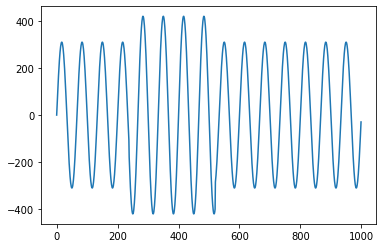

In [23]:
N = 1000

gen = Generator()
# create increasing counter
gen.add_variable(VARIABLES.Counter.value, name="base_idx", start_value=0)
# define state transitions
gen.add_variable(VARIABLES.MarkovChain.value, name="states", start_value="A", states=["A","B"], transitions=[("A","B",0.001),("B","A",0.005)])

# create state #1 - base signal
gen.add_transformation(TRANSFORMATIONS.Mult.value, in_columns=["base_idx"], out_columns=["h1_idx"], value=(15*2*pi)/N, drop_input=False)
gen.add_transformation(TRANSFORMATIONS.Sin.value, in_columns=["h1_idx"], out_columns=["h1"], drop_input=True)
gen.add_transformation(TRANSFORMATIONS.Mult.value, in_columns=["h1"], value=310)

# create state #2 - signal with increased amplitude
gen.add_transformation(TRANSFORMATIONS.Mult.value, in_columns=["base_idx"], out_columns=["h2_idx"], value=(15*2*pi)/N, drop_input=False)
gen.add_transformation(TRANSFORMATIONS.Sin.value, in_columns=["h2_idx"], out_columns=["h2"], drop_input=True)
gen.add_transformation(TRANSFORMATIONS.Mult.value, in_columns=["h2"], value=420)

# setup states in accordance to defined states and transitions
gen.add_transformation(TRANSFORMATIONS.StateChange.value, in_columns=["h1","h2"], state_column="states", states=["A","B"], out_column="interruption", drop_input=False)

df = gen.generate(N)
df["interruption"].plot(subplots=True);

## Flutuação da Tensão (flicker)
### Recreation of the series "Flutuação da Tensão (flicker)"
This type of signal occurs when there are changes at fixed intervals.<br>
It is characterized with periodic fluctuations to signal amplitude.<br>
<br>
To do this we use the "rectangular" variable, which repeats values with given periods.<br>
We change the amplitude by multiplying sinusoidal signal with these values.

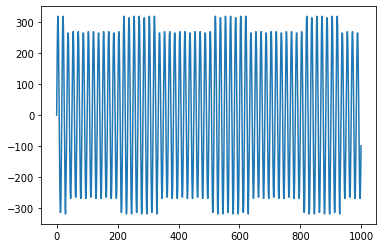

In [8]:
N = 1000

gen = Generator()
# create increasing counter
gen.add_variable(VARIABLES.Counter.value, name="base_idx", start_value=0)
# create amplitude periods
gen.add_variable(VARIABLES.Rectangular.value, name="flicker", values=[320,270,320], periods=[30,180,90])

# create state #1 - base signal
gen.add_transformation(TRANSFORMATIONS.Mult.value, in_columns=["base_idx"], out_columns=["h1_idx"], value=(60*2*pi)/N, drop_input=False)
gen.add_transformation(TRANSFORMATIONS.Sin.value, in_columns=["h1_idx"], out_columns=["h1"], drop_input=True)

# change amplitude to flicker
gen.add_transformation(TRANSFORMATIONS.Product.value, in_columns=["h1","flicker"], out_column="h", drop_input=False)

df = gen.generate(N)
df["h"].plot(subplots=True);

## Micro-cortes de Tensão (notches)
### Recreation of the series "Micro-cortes de Tensão (notches)"
These notches happen whenever there is a small and sudden change in tension.<br>
<br>
To create these we add transient noise, which is a small impulse followed by decay.

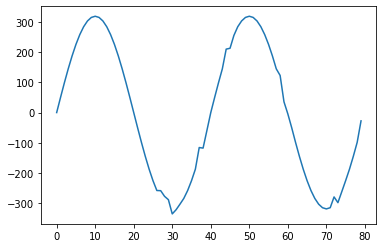

In [21]:
N = 80

gen = Generator()
# create increasing counter
gen.add_variable(VARIABLES.Counter.value, name="base_idx", start_value=0)

# create state #1 - base signal
gen.add_transformation(TRANSFORMATIONS.Mult.value, in_columns=["base_idx"], out_columns=["h1_idx"], value=(2*2*pi)/N, drop_input=False)
gen.add_transformation(TRANSFORMATIONS.Sin.value, in_columns=["h1_idx"], out_columns=["h1"], drop_input=True)
gen.add_transformation(TRANSFORMATIONS.Mult.value, in_columns=["h1"], value=320)

# add notchess
gen.add_transformation(TRANSFORMATIONS.Transient.value, in_columns=["h1"], out_columns=["h"], p=0.1, decay=10, min_strength=20, max_strength=30, decay_type="subtractive", drop_input=False)

df = gen.generate(N)
df["h"].plot(subplots=True);

## Transitório
### Recreation of the series "Transitório"
If there is a strong interference a transient can occur.<br>
This type of signal is characterized by normal operation with sporadic decaying noise.<br>
<br>
In the previous example, the transient transformation was used with instant decay.<br>
This time, however, a slower decay is chosen, which is a more intended usage of "transient".<br>

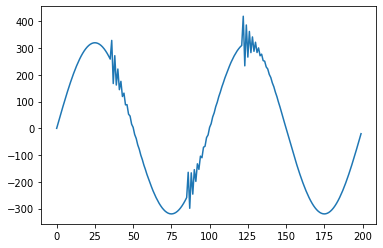

In [14]:
N = 200

gen = Generator()
# create increasing counter
gen.add_variable(VARIABLES.Counter.value, name="base_idx", start_value=0)

# create state #1 - base signal
gen.add_transformation(TRANSFORMATIONS.Mult.value, in_columns=["base_idx"], out_columns=["h1_idx"], value=(2*2*pi)/N, drop_input=False)
gen.add_transformation(TRANSFORMATIONS.Sin.value, in_columns=["h1_idx"], out_columns=["h1"], drop_input=True)
gen.add_transformation(TRANSFORMATIONS.Mult.value, in_columns=["h1"], value=320)

# add transients
gen.add_transformation(TRANSFORMATIONS.Transient.value, in_columns=["h1"], out_columns=["h"], p=0.01, decay=0.8, min_strength=1/3, max_strength=1/3, transient_type="multiplicative", drop_input=False)

df = gen.generate(N)
df["h"].plot(subplots=True);